In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# **Elementy odstające (*ang. outliers*)**

**Elementy odstające** to punkty danych znalazujące się w znacznej odległości od grupy innych punktów - byty wyróżniające się z tłumu.

Problemy spowodowane outliersami:

* Długi czas uczenia modelu predykcyjnego
* Kiepska dokładność predykcji
* Zwiększenie błędu wariancji
* Zmniejszenie normalności rozkładu danych
* Osłabienie mocy testów statystycznych

## Typy elementów odstających

**1. OUTLIERSY JEDNOWYMIAROWE**

  * Występują w rozkładach opisujących jedną zmienną
  
  * Przykład: wynagrodzenia pracowników w jednej firmie
  
  * Łatwo widoczne na histogramach i wykresach pudełkowych

**2. OUTLIERSY WIELOWYMIAROWE**

 * Znajdują się w przestrzeniach n-wymiarowych

 * Przykład: dane klientów (wiek, dochód, wydatki)

 * Trudniejsze do wykrycia bez specjalnych metod

# **Metody wykrywania elementów odstających**

### **Metoda 1**: Wykres pudełkowy


* Tworzy podział punktów ze względu na kwartyle (Q1, Q2, Q3)

* Dane między Q1 a Q3 umieszczane w prostokątnych pudełkach

* Elementy odstające wyświetlane jako pojedyncze punkty poza pudełkiem

* Pokazuje rozstęp ćwiartkowy (IQR)

**Zalety**:

* Wizualna reprezentacja

* Szybkie zidentyfikowanie outliersów

* Porównanie wielu zmiennych



### **Metoda 2**: Wykres punktowy

* Wyświetla punkty na dwuwymiarowym układzie współrzędnych
* Jedna zmienna na osi X, druga na osi Y
* Idealny do wizualizacji relacji między dwoma zmiennymi
* Anomalie widoczne jako izolowane punkty daleko od klastera

**Zalety**:

* Łatwa identyfikacja outlierów wielowymiarowych
* Wizualna analiza trendów
* Pokazuje korelacje między zmiennymi

### **Metoda 3**: Wynik standaryzowany Z-score
**Formuła:**

z = (x - μ) / σ

Gdzie:

x = wartość danych,
μ = średnia (mean),
σ = odchylenie standardowe (standard deviation)

**Reguła**:

|z| > 3 → element odstający (99.7% danych powinno mieć |z| ≤ 3)

|z| > 2.5 → potencjalny outlier

**Założenia:**

* Rozkład normalny danych

* Metoda parametryczna

### **Metoda 4**: Rozstęp ćwiartkowy (IQR)
**Formuła:**
  IQR = Q3 - Q1

Gdzie: Q1 = pierwszy kwartyl (25. percentyl), Q3 = trzeci kwartyl (75. percentyl)

**Zasada outliersów**:

* Dolny limit: Q1 - 1.5 × IQR

* Górny limit: Q3 + 1.5 × IQR

* Wartości poza limitami = outliersy

**Zalety**:

* Odporna miara (mało wrażliwa na ekstrema)
* Nie wymaga założenia o rozkładzie normalnym
* Metoda nieparametryczna



### **Metoda 5**: Percentyl

**Percentyl** dzieli dane na 100 grup o równych rozmiarach. Wartość percentyla określa procent populacji znajdujący się poniżej tej wartości.

**Przykłady**:

* 1. percentyl: bardzo niskie wartości
* 50. percentyl: mediana
* 99. percentyl: bardzo wysokie wartości



**Reguła outliersów**:

* Wartości poniżej 1. percentyla → outliersy niskie
* Wartości powyżej 99. percentyla → outliersy wysokie
* Można również użyć 5. i 95. percentyla

## **PODSUMOWANIE**

1. **CO TO OUTLIER?**
   
   Punkt danych daleko od głównej grupy, wyróżniający się z tłumu

2. **DLACZEGO WAŻNY?**
   
   Psuje modele, zmniejsza dokładność, zwiększa błąd

3. **METODY WYKRYWANIA:**

    * Boxplot (wykres pudełkowy)

    * Scatter plot (wykres punktowy)

    * Z-score (standaryzacja)

    * IQR (rozstęp ćwiartkowy)

    * Percentyle

4. **KLUCZOWE TERMINY:**
Q1, Q3, IQR, σ (sigma), μ (mu), z-score, outlier

## **Przykład praktyczny**

**Dane**:
Wynagrodzenia pracowników (tys. zł): 2.5, 2.8, 3.0, 3.2, 3.5, 4.0, 4.2, 4.5, 5.0, 15.0


In [2]:
# Dane: wynagrodzenia (tys. zł)
dane = np.array([2.5, 2.8, 3.0, 3.2, 3.5, 4.0, 4.2, 4.5, 5.0, 15.0])
print("\n1. DANE TESTOWE:")
print(f"   Wynagrodzenia: {dane}")
print(f"   Liczba obserwacji: {len(dane)}")


1. DANE TESTOWE:
   Wynagrodzenia: [ 2.5  2.8  3.   3.2  3.5  4.   4.2  4.5  5.  15. ]
   Liczba obserwacji: 10


In [3]:
print("\n" + "="*60)
print("METODA 1: WYKRES PUDEŁKOWY (BOXPLOT - IQR)")
print("="*60)

Q1 = np.percentile(dane, 25)
Q3 = np.percentile(dane, 75)
IQR = Q3 - Q1
dolny_limit = Q1 - 1.5 * IQR
gorny_limit = Q3 + 1.5 * IQR

print(f"\nQ1 (25. percentyl) = {Q1:.2f}")
print(f"Q3 (75. percentyl) = {Q3:.2f}")
print(f"IQR = Q3 - Q1 = {IQR:.2f}")
print(f"\nLimity dla outliersów:")
print(f"  Dolny limit = Q1 - 1.5 × IQR = {Q1:.2f} - 1.5 × {IQR:.2f} = {dolny_limit:.2f}")
print(f"  Górny limit = Q3 + 1.5 × IQR = {Q3:.2f} + 1.5 × {IQR:.2f} = {gorny_limit:.2f}")

outliersy_iqr = dane[(dane < dolny_limit) | (dane > gorny_limit)]
print(f"\n✓ OUTLIERSY WYKRYTE (metoda IQR): {outliersy_iqr}")


METODA 1: WYKRES PUDEŁKOWY (BOXPLOT - IQR)

Q1 (25. percentyl) = 3.05
Q3 (75. percentyl) = 4.42
IQR = Q3 - Q1 = 1.38

Limity dla outliersów:
  Dolny limit = Q1 - 1.5 × IQR = 3.05 - 1.5 × 1.38 = 0.99
  Górny limit = Q3 + 1.5 × IQR = 4.42 + 1.5 × 1.38 = 6.49

✓ OUTLIERSY WYKRYTE (metoda IQR): [15.]


In [4]:
print("\n" + "="*60)
print("METODA 2: Z-SCORE")
print("="*60)

srednia = np.mean(dane)
std_dev = np.std(dane, ddof=1)  # ddof=1 dla próby
z_scores = np.abs(stats.zscore(dane))

print(f"\nŚrednia (μ) = {srednia:.2f}")
print(f"Odchylenie standardowe (σ) = {std_dev:.2f}")
print(f"\nFormuła: z = (x - μ) / σ")
print(f"\nZ-score dla każdej wartości:")

for i, (wartosc, z) in enumerate(zip(dane, z_scores)):
    status = "⚠️ OUTLIER" if z > 3 else ""
    print(f"  {wartosc:5.1f} → z = {z:6.2f} {status}")

outliersy_z = dane[z_scores > 3]
print(f"\n✓ OUTLIERSY WYKRYTE (z > 3): {outliersy_z}")


METODA 2: Z-SCORE

Średnia (μ) = 4.77
Odchylenie standardowe (σ) = 3.68

Formuła: z = (x - μ) / σ

Z-score dla każdej wartości:
    2.5 → z =   0.65 
    2.8 → z =   0.56 
    3.0 → z =   0.51 
    3.2 → z =   0.45 
    3.5 → z =   0.36 
    4.0 → z =   0.22 
    4.2 → z =   0.16 
    4.5 → z =   0.08 
    5.0 → z =   0.07 
   15.0 → z =   2.93 

✓ OUTLIERSY WYKRYTE (z > 3): []


In [5]:
print("\n" + "="*60)
print("METODA 3: PERCENTYL")
print("="*60)

p1 = np.percentile(dane, 1)
p99 = np.percentile(dane, 99)
p5 = np.percentile(dane, 5)
p95 = np.percentile(dane, 95)

print(f"\n1. percentyl = {p1:.2f}")
print(f"5. percentyl = {p5:.2f}")
print(f"95. percentyl = {p95:.2f}")
print(f"99. percentyl = {p99:.2f}")

print(f"\nOutliersy poniżej 1. percentyla: {dane[dane < p1]}")
print(f"Outliersy powyżej 99. percentyla: {dane[dane > p99]}")


METODA 3: PERCENTYL

1. percentyl = 2.53
5. percentyl = 2.63
95. percentyl = 10.50
99. percentyl = 14.10

Outliersy poniżej 1. percentyla: [2.5]
Outliersy powyżej 99. percentyla: [15.]


In [6]:
print("\n" + "="*60)
print("PODSUMOWANIE - PORÓWNANIE METOD")
print("="*60)

print(f"\n{'Metoda':<25} {'Wykryte outliersy':<30} {'Liczba'}")
print("-" * 60)
print(f"{'IQR':<25} {str(outliersy_iqr):<30} {len(outliersy_iqr)}")
print(f"{'Z-score (|z| > 3)':<25} {str(outliersy_z):<30} {len(outliersy_z)}")
print(f"{'Percentyl (1-99%)':<25} {str(dane[(dane < p1) | (dane > p99)]):<30} {len(dane[(dane < p1) | (dane > p99)])}")


PODSUMOWANIE - PORÓWNANIE METOD

Metoda                    Wykryte outliersy              Liczba
------------------------------------------------------------
IQR                       [15.]                          1
Z-score (|z| > 3)         []                             0
Percentyl (1-99%)         [ 2.5 15. ]                    2


In [7]:
print("\n" + "="*60)
print("PRZYKŁAD 2: DANE WIELOWYMIAROWE")
print("="*60)

dane_2d = np.array([
    [25, 30000],  # wiek, dochód (tys. zł)
    [27, 32000],
    [26, 31000],
    [28, 33000],
    [30, 35000],
    [28, 250000],  # ← OUTLIER!
])

df = pd.DataFrame(dane_2d, columns=['Wiek', 'Dochód'])
print("\nDane klientów (Wiek, Dochód w tys. zł):")
print(df.to_string(index=False))

# Z-score dla każdej kolumny
z_scores_wiek = np.abs(stats.zscore(df['Wiek']))
z_scores_dochod = np.abs(stats.zscore(df['Dochód']))

outliersy_2d = df[(z_scores_wiek > 2) | (z_scores_dochod > 2)]
print(f"\n✓ OUTLIERSY WIELOWYMIAROWE (z > 2 dla dowolnej zmiennej):")
print(outliersy_2d.to_string())



PRZYKŁAD 2: DANE WIELOWYMIAROWE

Dane klientów (Wiek, Dochód w tys. zł):
 Wiek  Dochód
   25   30000
   27   32000
   26   31000
   28   33000
   30   35000
   28  250000

✓ OUTLIERSY WIELOWYMIAROWE (z > 2 dla dowolnej zmiennej):
   Wiek  Dochód
5    28  250000


## Wizualizacja analizy

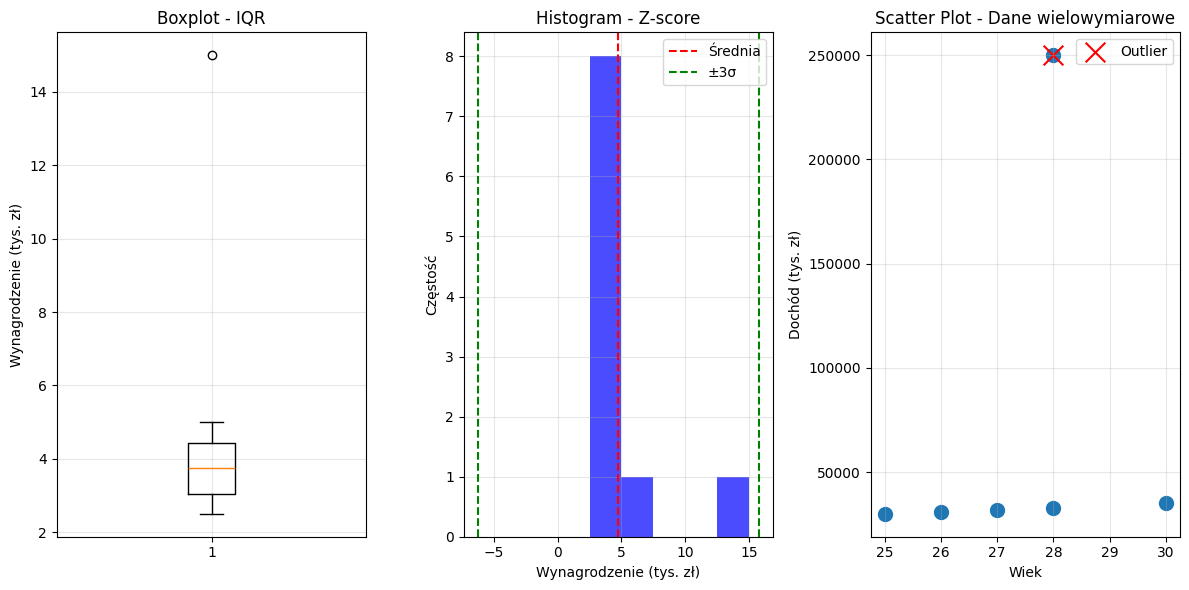

In [8]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.boxplot(dane)
plt.ylabel('Wynagrodzenie (tys. zł)')
plt.title('Boxplot - IQR')
plt.grid(True, alpha=0.3)

# Histogram z Z-score
plt.subplot(1, 3, 2)
plt.hist(dane, bins=5, alpha=0.7, color='blue')
plt.axvline(srednia, color='red', linestyle='--', label='Średnia')
plt.axvline(srednia + 3*std_dev, color='green', linestyle='--', label='±3σ')
plt.axvline(srednia - 3*std_dev, color='green', linestyle='--')
plt.xlabel('Wynagrodzenie (tys. zł)')
plt.ylabel('Częstość')
plt.title('Histogram - Z-score')
plt.legend()
plt.grid(True, alpha=0.3)

# Scatter plot 2D
plt.subplot(1, 3, 3)
plt.scatter(dane_2d[:, 0], dane_2d[:, 1], s=100)
plt.scatter(dane_2d[-1, 0], dane_2d[-1, 1], color='red', s=200, marker='x', label='Outlier')
plt.xlabel('Wiek')
plt.ylabel('Dochód (tys. zł)')
plt.title('Scatter Plot - Dane wielowymiarowe')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# **Zadanie 1**


Pracujesz w firmie zajmującej się e-commerce. Otrzymałeś dane o sprzedaży
dziennej (liczba sztuk) z ostatnich 30 dni.


ZADANIE:
- Wczytaj dane sprzedażowe
- Zrób wizualizację danych
- Zastosuj metodę IQR, z-score oraz opartą na percentylach (1-99%)
- Zidentyfikuj outliersów
- Wyjaśnij co mogło się stać



In [14]:
# Przykładowe dane sprzedażowe (liczba sztuk dziennie)
sprzedaz_dzienna = np.array([
    50, 55, 60, 58, 62, 65, 70, 68, 72, 75,
    78, 80, 82, 85, 88, 90, 92, 95, 98, 100,
    105, 110, 115, 120, 125, 130, 135, 140, 150, 300 # Dodany outlier
])

print("\n===== Zadanie 1: Analiza danych sprzedażowych =====")
print("\nDane sprzedażowe (liczba sztuk):")
print(sprzedaz_dzienna)
print(f"\nLiczba dni: {len(sprzedaz_dzienna)}")


===== Zadanie 1: Analiza danych sprzedażowych =====

Dane sprzedażowe (liczba sztuk):
[ 50  55  60  58  62  65  70  68  72  75  78  80  82  85  88  90  92  95
  98 100 105 110 115 120 125 130 135 140 150 300]

Liczba dni: 30


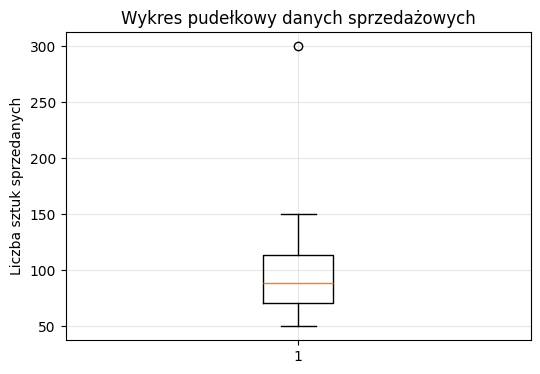

In [15]:
# Wizualizacja danych - Boxplot
plt.figure(figsize=(6, 4))
plt.boxplot(sprzedaz_dzienna)
plt.ylabel('Liczba sztuk sprzedanych')
plt.title('Wykres pudełkowy danych sprzedażowych')
plt.grid(True, alpha=0.3)
plt.show()

In [16]:
# Metoda IQR
print("\n" + "="*30)
print("METODA: IQR")
print("="*30)

Q1_sprzedaz = np.percentile(sprzedaz_dzienna, 25)
Q3_sprzedaz = np.percentile(sprzedaz_dzienna, 75)
IQR_sprzedaz = Q3_sprzedaz - Q1_sprzedaz
dolny_limit_sprzedaz = Q1_sprzedaz - 1.5 * IQR_sprzedaz
gorny_limit_sprzedaz = Q3_sprzedaz + 1.5 * IQR_sprzedaz

print(f"Q1 (25. percentyl) = {Q1_sprzedaz:.2f}")
print(f"Q3 (75. percentyl) = {Q3_sprzedaz:.2f}")
print(f"IQR = {IQR_sprzedaz:.2f}")
print(f"\nLimity dla outliersów:")
print(f"  Dolny limit = {dolny_limit_sprzedaz:.2f}")
print(f"  Górny limit = {gorny_limit_sprzedaz:.2f}")

outliers_iqr_sprzedaz = sprzedaz_dzienna[(sprzedaz_dzienna < dolny_limit_sprzedaz) | (sprzedaz_dzienna > gorny_limit_sprzedaz)]
print(f"\nOutliersy wykryte (metoda IQR): {outliers_iqr_sprzedaz}")


METODA: IQR
Q1 (25. percentyl) = 70.50
Q3 (75. percentyl) = 113.75
IQR = 43.25

Limity dla outliersów:
  Dolny limit = 5.62
  Górny limit = 178.62

Outliersy wykryte (metoda IQR): [300]


In [17]:
# Metoda Z-score
print("\n" + "="*30)
print("METODA: Z-SCORE")
print("="*30)

srednia_sprzedaz = np.mean(sprzedaz_dzienna)
std_dev_sprzedaz = np.std(sprzedaz_dzienna, ddof=1)
z_scores_sprzedaz = np.abs(stats.zscore(sprzedaz_dzienna))

print(f"Średnia (μ) = {srednia_sprzedaz:.2f}")
print(f"Odchylenie standardowe (σ) = {std_dev_sprzedaz:.2f}")

outliers_z_sprzedaz = sprzedaz_dzienna[z_scores_sprzedaz > 3]
print(f"\nOutliersy wykryte (|z| > 3): {outliers_z_sprzedaz}")


METODA: Z-SCORE
Średnia (μ) = 98.43
Odchylenie standardowe (σ) = 46.68

Outliersy wykryte (|z| > 3): [300]


In [18]:
# Metoda Percentyl (1-99%)
print("\n" + "="*30)
print("METODA: PERCENTYL (1-99%)")
print("="*30)

p1_sprzedaz = np.percentile(sprzedaz_dzienna, 1)
p99_sprzedaz = np.percentile(sprzedaz_dzienna, 99)

print(f"1. percentyl = {p1_sprzedaz:.2f}")
print(f"99. percentyl = {p99_sprzedaz:.2f}")

outliers_percentyl_sprzedaz = sprzedaz_dzienna[(sprzedaz_dzienna < p1_sprzedaz) | (sprzedaz_dzienna > p99_sprzedaz)]
print(f"\nOutliersy wykryte (percentyl 1-99%): {outliers_percentyl_sprzedaz}")


METODA: PERCENTYL (1-99%)
1. percentyl = 51.45
99. percentyl = 256.50

Outliersy wykryte (percentyl 1-99%): [ 50 300]


## Wyjaśnienie wyników

Wykres pudełkowy i zastosowane metody (IQR, Z-score, Percentyl) wskazały na wartość **300** jako potencjalny outlier.

Taka znacząco wyższa sprzedaż w ciągu jednego dnia może być spowodowana różnymi czynnikami, np.:

* **Promocja lub specjalna oferta:** Duża zniżka lub kampania marketingowa mogła znacząco zwiększyć sprzedaż.
* **Wprowadzenie nowego, bardzo popularnego produktu:** Nowy produkt, który od razu zyskał dużą popularność.
* **Błąd w danych:** Błędne wprowadzenie danych (np. pomyłka w liczbie sztuk).
* **Sezonowość lub specjalne wydarzenie:** Sprzedaż mogła wzrosnąć z powodu święta, weekendowej wyprzedaży, Black Friday itp.


## **Zadanie 2**

Jesteś analitykiem w banku. Otrzymałeś dane o klientach zaciągających kredyty.
Każdy klient ma 4 cechy:
  1. Wiek (lata)
  2. Dochód roczny (tys. PLN)
  3. Suma kredytów (tys. PLN)
  4. Liczba lat jako klient

Do zrobienia:
- Zidentyfikować klientów wielowymiarowych outliersów
- Użyj metody z-score dla każdego wymiaru osobno



In [19]:
print("\n===== Zadanie 2: Analiza danych klientów banku =====")

# Przykładowe dane klientów (Wiek, Dochód roczny (tys. PLN), Suma kredytów (tys. PLN), Liczba lat jako klient)
dane_bankowe = np.array([
    [30, 50, 100, 5],
    [35, 60, 150, 7],
    [28, 45, 80, 3],
    [40, 70, 200, 10],
    [32, 55, 120, 6],
    [55, 80, 300, 15], # Potencjalny outlier (wiek, dochód, kredyt, lata)
    [22, 40, 50, 1],
    [45, 75, 250, 12],
    [38, 65, 180, 8],
    [60, 90, 400, 20], # Potencjalny outlier (wiek, dochód, kredyt, lata)
    [31, 52, 110, 5],
    [33, 58, 130, 7],
    [29, 48, 90, 4],
    [42, 72, 220, 11],
    [34, 57, 140, 6],
    [18, 30, 20, 0], # Potencjalny outlier (wiek, dochód, kredyt, lata) - niski
    [70, 150, 800, 30], # Wyraźny outlier (wiek, dochód, kredyt, lata) - wysoki
    [36, 63, 160, 9],
    [39, 68, 190, 9],
    [50, 85, 350, 18]  # Potencjalny outlier (wiek, dochód, kredyt, lata)
])

df_bank = pd.DataFrame(dane_bankowe, columns=['Wiek', 'Dochód roczny (tys. PLN)', 'Suma kredytów (tys. PLN)', 'Liczba lat jako klient'])

print("\nDane klientów banku:")
display(df_bank)


===== Zadanie 2: Analiza danych klientów banku =====

Dane klientów banku:


,Wiek,Dochód roczny (tys. PLN),Suma kredytów (tys. PLN),Liczba lat jako klient
0,30,50,100,5
1,35,60,150,7
2,28,45,80,3
3,40,70,200,10
4,32,55,120,6
5,55,80,300,15
6,22,40,50,1
7,45,75,250,12
8,38,65,180,8
9,60,90,400,20


In [20]:
print("\n" + "="*60)
print("METODA Z-SCORE DLA DANYCH WIELOWYMIAROWYCH")
print("="*60)

# Oblicz Z-score dla każdej kolumny
z_scores_bank = df_bank.apply(lambda x: np.abs(stats.zscore(x)))

print("\nZ-scores dla każdej cechy:")
display(z_scores_bank)

# Zidentyfikuj outliersy wielowymiarowe (jeśli Z-score > 3 dla DOWOLNEJ cechy)
# Możemy dostosować próg (np. > 2.5) w zależności od potrzeb
próg_zscore = 3
outliers_mask = (z_scores_bank > próg_zscore).any(axis=1)
outliers_bank = df_bank[outliers_mask]

print(f"\n✓ OUTLIERSY WIELOWYMIAROWE (jeśli |z| > {próg_zscore} dla dowolnej cechy):")
display(outliers_bank)

# Możemy również wyświetlić Z-scores dla znalezionych outliersów
print(f"\nZ-scores dla wykrytych outliersów:")
display(z_scores_bank[outliers_mask])


METODA Z-SCORE DLA DANYCH WIELOWYMIAROWYCH

Z-scores dla każdej cechy:


,Wiek,Dochód roczny (tys. PLN),Suma kredytów (tys. PLN),Liczba lat jako klient
0,0.676324,0.643631,0.612682,0.621884
1,0.271340,0.232365,0.312348,0.332635
2,0.838318,0.849264,0.732815,0.911132
3,0.133645,0.178901,0.012013,0.101237
4,0.514330,0.437998,0.492548,0.477259
5,1.348598,0.590167,0.588655,0.824357
6,1.324299,1.054897,0.913016,1.200380
7,0.538629,0.384534,0.288321,0.390485
8,0.028349,0.026732,0.132147,0.188011
9,1.753583,1.001432,1.189323,1.547478



✓ OUTLIERSY WIELOWYMIAROWE (jeśli |z| > 3 dla dowolnej cechy):


,Wiek,Dochód roczny (tys. PLN),Suma kredytów (tys. PLN),Liczba lat jako klient
16,70,150,800,30



Z-scores dla wykrytych outliersów:


,Wiek,Dochód roczny (tys. PLN),Suma kredytów (tys. PLN),Liczba lat jako klient
16,2.563552,3.469028,3.591997,2.993719


## Wyjaśnienie wyników Zadania 2

Wyniki pokazują klientów, którzy znacząco odbiegają od średniej w co najmniej jednym wymiarze. Na przykład, klient o wieku 70 lat, dochodzie 150 tys. PLN, sumie kredytów 800 tys. PLN i 30 latach jako klient banku został zidentyfikowany jako outlier, ponieważ jego wartości we wszystkich tych cechach są znacznie wyższe niż średnie dla pozostałych klientów, co potwierdzają wysokie wartości Z-score.

Tacy klienci mogą wymagać dalszej analizy, ponieważ ich nietypowe profile mogą wskazywać na różne sytuacje, np.:

* **Klienci z segmentu premium/private banking:** Mogą mieć znacznie wyższe dochody i sumy kredytów.
* **Potencjalne błędy w danych:** Błędnie wprowadzone wartości.
* **Nietypowe zachowania finansowe:** Wymagające indywidualnego podejścia.
* **Bardzo lojalni klienci:** Z długim stażem w banku.

Identyfikacja takich outliersów jest ważna w bankowości do celów zarządzania ryzykiem, marketingu (identyfikacja klientów o wysokim potencjale) czy wykrywania oszustw.